# Table of content

1.[Twitter WeRateDogs Project]    
  1.1 [Gathering]    
      1.1.1 [Gathering - twitter-archive-enhanced]    
      1.1.2 [Gathering - image-predictions]    
      1.1.3 [Gathering - tweepy.API]    
  1.2 [Assess]    
      1.2.1 [Quality]    
      1.2.2 [Tidness]    
  1.3 [Clean]    
      1.3.1 [Quality]   
      1.3.2 [Tideness]   
  1.4 [Saving master sheet]   
  1.5 [Visualization]   
      1.5.1 [Tweet Count / year]   
      1.5.2 [Tweet frequency / Source]  
      1.5.3 [Beloved dog_stage from likes(favourite_count)]  
      1.5.4 [Beloved dog_stage from text_rating]  
      1.5.5 [Beloved dog name from likes(favourite_count)]  
      
      
      
      
      

# 1.Twitter WeRateDogs Project

## 1.1 Gathering 

###  1.1.1 Gathering - twitter-archive-enhanced

In [1]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline
plt.close("all")
import seaborn as sns 
sns.set_style('darkgrid')
from datetime import time 


df_1 = pd.read_csv('twitter-archive-enhanced.csv')

df_1


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


###  1.1.2 Gathering - image-predictions

In [2]:
import pandas as pd
import requests


url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url, allow_redirects=True)

open('image-predictions.tsv', 'wb').write(r.content)

df_2 = pd.read_csv('image-predictions.tsv',sep='\t')

df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


###  1.1.3 Gathering - tweepy.API

In [3]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
        
df_3 = pd.DataFrame(df_list)
df_3.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## 1.2 Assess

In [4]:
df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2320,666437273139982337,NaN,NaN,2015-11-17 02:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see a lone northeastern Cumberbatch. H...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666437273...,7,10,None,None,None,None,None
270,841314665196081154,NaN,NaN,2017-03-13 15:47:01 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841314665...,13,10,Max,None,None,None,None
1783,677673981332312066,NaN,NaN,2015-12-18 02:17:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Endangered triangular pup here. Could be a wiz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677673981...,9,10,None,None,None,None,None
163,860276583193509888,NaN,NaN,2017-05-04 23:34:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jordy. He likes to go on adventures an...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/860276583...,12,10,Jordy,None,None,None,None
1111,733482008106668032,NaN,NaN,2016-05-20 02:18:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Ello this is dog how may I assist"" ...10/10 h...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/733482008...,10,10,None,None,None,None,None
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,None,None,None,None
943,752701944171524096,NaN,NaN,2016-07-12 03:11:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: HEY PUP WHAT'S THE PART OF THE ...,6.835159e+17,4.196984e+09,2016-01-03 05:11:12 +0000,"https://vine.co/v/ibvnzrauFuV,https://vine.co/...",11,10,None,None,None,None,None
1609,685547936038666240,NaN,NaN,2016-01-08 19:45:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Everybody needs to read this. Jack is our firs...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685547936...,14,10,None,None,None,pupper,None
1547,689280876073582592,NaN,NaN,2016-01-19 02:59:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Herald. He wants you to know he could ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689280876...,10,10,Herald,None,None,None,None
982,749403093750648834,NaN,NaN,2016-07-03 00:43:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Duuun dun... duuun dun... dunn dun. dunn dun....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749403093...,10,10,None,None,None,None,None


In [5]:
df_1.shape

(2356, 17)

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
df_1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df_1['tweet_id'].duplicated().sum()

0

In [9]:
df_1['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'], dtype=object)

In [10]:
df_1.text.head()

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

In [11]:
df_1['expanded_urls'].isnull().sum()

59

In [12]:
df_1.expanded_urls.head(50)

0     https://twitter.com/dog_rates/status/892420643...
1     https://twitter.com/dog_rates/status/892177421...
2     https://twitter.com/dog_rates/status/891815181...
3     https://twitter.com/dog_rates/status/891689557...
4     https://twitter.com/dog_rates/status/891327558...
5     https://twitter.com/dog_rates/status/891087950...
6     https://gofundme.com/ydvmve-surgery-for-jax,ht...
7     https://twitter.com/dog_rates/status/890729181...
8     https://twitter.com/dog_rates/status/890609185...
9     https://twitter.com/dog_rates/status/890240255...
10    https://twitter.com/dog_rates/status/890006608...
11    https://twitter.com/dog_rates/status/889880896...
12    https://twitter.com/dog_rates/status/889665388...
13    https://twitter.com/dog_rates/status/889638837...
14    https://twitter.com/dog_rates/status/889531135...
15    https://twitter.com/dog_rates/status/889278841...
16    https://twitter.com/dog_rates/status/888917238...
17    https://twitter.com/dog_rates/status/88880

In [13]:
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [14]:
x = df_1.query('rating_numerator <= 5') 
x.sample(30)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2134,670069087419133954,NaN,NaN,2015-11-27 02:38:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Randall. He's from Chernobyl. Built pl...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670069087...,5,10,Randall,None,None,None,None
1820,676588346097852417,NaN,NaN,2015-12-15 02:23:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bubbles. He kinda resembles a fish. Al...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/676588346...,5,10,Bubbles,None,None,None,None
2136,670055038660800512,NaN,NaN,2015-11-27 01:42:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tommy. He's a cool dog. Hard not to st...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670055038...,3,10,Tommy,None,None,None,None
1624,684880619965411328,NaN,NaN,2016-01-06 23:33:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a basking dino pupper. Looks powe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684880619...,5,10,None,None,None,pupper,None
1901,674646392044941312,NaN,NaN,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674646392...,5,10,None,None,None,None,None
1692,681302363064414209,NaN,NaN,2015-12-28 02:35:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Chuck. He's a neat dog. Very flexible....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
1249,711306686208872448,NaN,NaN,2016-03-19 21:41:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What hooligan sent in pictures w/out a dog in ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/711306686...,3,10,None,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
2242,667911425562669056,NaN,NaN,2015-11-21 03:44:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Wow. Armored dog here. Ready for battle. Face ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667911425...,5,10,None,None,None,None,None


In [15]:
y = df_1.query('rating_numerator >= 15')
y

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [16]:
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [17]:
df_1['rating_denominator'][df_1['rating_denominator'] != 10].value_counts()

50     3
11     3
20     2
80     2
90     1
40     1
130    1
2      1
70     1
7      1
110    1
170    1
120    1
15     1
16     1
150    1
0      1
Name: rating_denominator, dtype: int64

In [18]:
df_1[df_1['rating_denominator'] !=10].text


313     @jonnysun @Lin_Manuel ok jomny I know you're e...
342              @docmisterio account started on 11/15/15
433     The floofs have been released I repeat the flo...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
784     RT @dog_rates: After so many requests, this is...
902     Why does this never happen at my front door......
1068    After so many requests, this is Bretagne. She ...
1120    Say hello to this unbelievably well behaved sq...
1165    Happy 4/20 from the squad! 13/10 for all https...
1202    This is Bluebert. He just saw that both #Final...
1228    Happy Saturday here's 9 puppers on a bench. 99...
1254    Here's a brigade of puppers. All look very pre...
1274    From left to right:\nCletus, Jerome, Alejandro...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1433    Happy Wednesday here's a bucket of pups. 44/40...
1598    Yes I do realize a rating of 4/20 would've bee...
1634    Two sneaky puppers were not initially seen, mo...
1635    Someon

In [19]:
df_1['name'].value_counts()

None            745
a                55
Charlie          12
Lucy             11
Cooper           11
Oliver           11
Tucker           10
Penny            10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Buddy             7
Toby              7
Daisy             7
an                7
Bella             6
Milo              6
Dave              6
Oscar             6
Scout             6
Jax               6
Leo               6
Koda              6
Jack              6
Rusty             6
Stanley           6
Phil              5
               ... 
Mary              1
old               1
unacceptable      1
Vinnie            1
Tupawc            1
Batdog            1
Norman            1
Divine            1
Wiggles           1
Napolean          1
Finnegus          1
Ashleigh          1
Juckson           1
Ester             1
Sage              1
Tanner            1
Patch             1
Ed                1
Timber            1


In [20]:
df_1['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [21]:
list(df_1.name[df_1.name.isin(df_1.name[df_1.name.str.islower()])])


['such',
 'a',
 'quite',
 'quite',
 'quite',
 'not',
 'one',
 'incredibly',
 'a',
 'mad',
 'an',
 'very',
 'a',
 'very',
 'just',
 'my',
 'one',
 'not',
 'his',
 'one',
 'a',
 'a',
 'a',
 'an',
 'very',
 'actually',
 'a',
 'just',
 'getting',
 'mad',
 'very',
 'this',
 'unacceptable',
 'all',
 'a',
 'old',
 'a',
 'infuriating',
 'a',
 'a',
 'a',
 'an',
 'a',
 'a',
 'very',
 'getting',
 'just',
 'a',
 'the',
 'the',
 'actually',
 'by',
 'a',
 'officially',
 'a',
 'the',
 'the',
 'a',
 'a',
 'a',
 'a',
 'life',
 'a',
 'one',
 'a',
 'a',
 'a',
 'light',
 'just',
 'space',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'an',
 'a',
 'the',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'a',
 'quite',
 'a',
 'an',
 'a',
 'an',
 'the',
 'the',
 'a',
 'a',
 'an',
 'a',
 'a',
 'a',
 'a']

In [22]:
df_2.sample(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
757,688547210804498433,https://pbs.twimg.com/media/CY42CFWW8AACOwt.jpg,1,papillon,0.531279,True,Blenheim_spaniel,0.214197,True,Border_collie,0.053840,True
400,673688752737402881,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,1,soft-coated_wheaten_terrier,0.340806,True,Sealyham_terrier,0.234898,True,kuvasz,0.203495,True
194,669573570759163904,https://pbs.twimg.com/media/CUrNmtFWoAAnWCD.jpg,1,West_Highland_white_terrier,0.946828,True,miniature_schnauzer,0.022344,True,cairn,0.009462,True
2061,889638837579907072,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1,French_bulldog,0.991650,True,boxer,0.002129,True,Staffordshire_bullterrier,0.001498,True
48,666826780179869698,https://pbs.twimg.com/media/CUELa0NUkAAscGC.jpg,1,Maltese_dog,0.359383,True,teddy,0.148759,False,West_Highland_white_terrier,0.106007,True
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
333,672160042234327040,https://pbs.twimg.com/media/CVP9_beUEAAwURR.jpg,1,pug,0.561027,True,French_bulldog,0.222114,True,Labrador_retriever,0.065456,True
1353,760190180481531904,https://pbs.twimg.com/media/Coy87yiWYAACtPf.jpg,1,balloon,0.917525,False,confectionery,0.049329,False,maraca,0.017648,False
1897,850380195714523136,https://pbs.twimg.com/ext_tw_video_thumb/85038...,1,Yorkshire_terrier,0.249012,True,Maltese_dog,0.166364,True,Shih-Tzu,0.142254,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True


In [23]:
df_2.shape

(2075, 12)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
df_2['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [27]:
df_3.sample(20)

,favorite_count,retweet_count,tweet_id
2320,330,204,666430724426358785
941,0,3291,752701944171524096
2142,536,183,669942763794931712
632,10295,2187,793845145112371200
951,6428,2227,751830394383790080
513,14265,3650,811627233043480576
171,16304,3771,858843525470990336
1317,3404,1150,706516534877929472
2255,398,162,667728196545200128
2293,346,135,667119796878725120


In [28]:
df_3.isnull().sum()

favorite_count    0
retweet_count     0
tweet_id          0
dtype: int64

In [29]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [30]:
df_3.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


## After Visaual and programatic assessment .

### 1.2.1 Quality

'df_1' dataset :  
* [1] (in_reply_to_status_id ,in_reply_to_user_id) not null values == validity issue.        
* [2] (retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) not null values == validity issue  
* [3] timestamp column isn't date time.  
* [4] extract source of tweet from source column and categorize it. 
* [5] text column contain urls.
* [6] expanded_urls have NaN values.
* [7] some expanded_urls contain duplicated urls in the same value.
* [8] some rating_denominator value == accuracy issue.
* [9] some rating_numerator value not == validity issue.
* [10] doggo,floofer,pupper,puppo columns has 'none' for missing values.  
* [11] some name column values == validity issue.  

'df_2' dataset :   
* [12] img_num column == consistency .
* [13] df_2 should contain only the highest prediction confident of breed and the breed name instead of 3 predictions.


### 1.2.2 Tidness
* [1] 'df_1' table : doggo,floofer,pupper,puppo are variable not columns.  
* [2] All should be in one dataset.


## 1.3 Clean

In [31]:
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

### 1.3.1 Quality


#### 1.3.1.1 Define

* 'df_1' dataset :(in_reply_to_status_id ,in_reply_to_user_id) not_null values == validity issue.

#### 1.3.1.1 Code

In [32]:
## null values are the required rows so I used is_null method to drop not_null rows.

df1_clean= df1_clean[df1_clean['in_reply_to_status_id'].isnull()]
df1_clean= df1_clean[df1_clean['in_reply_to_user_id'].isnull()]

df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 1.3.1.1Test

In [33]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2278 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2278 non-null object
source                        2278 non-null object
text                          2278 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2274 non-null object
rating_numerator              2278 non-null int64
rating_denominator            2278 non-null int64
name                          2278 non-null object
doggo                         2278 non-null object
floofer                       2278 non-null object
pupper                        2278 non-null object
puppo                         2278 non-null object
dtypes: float64(4), int64(3), obje

#### 1.3.1.2 Define

* 'df_1' dataset :(retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp) not_null values == validity issue.



#### 1.3.1.2Code

In [34]:
## null values are the required rows so I used is_null method to drop not_null rows.

df1_clean= df1_clean[df1_clean['retweeted_status_id'].isnull()]
df1_clean= df1_clean[df1_clean['retweeted_status_user_id'].isnull()]
df1_clean= df1_clean[df1_clean['retweeted_status_timestamp'].isnull()]

df1_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 1.3.1.2 Test

In [35]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

#### 1.3.1.3 Define 

* columns ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id' ] not required


#### 1.3.1.3 Code

In [36]:
## drop columns ['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp','in_reply_to_status_id', 'in_reply_to_user_id' ]
df1_clean = df1_clean.drop(columns=['retweeted_status_id', 'retweeted_status_user_id' ,'retweeted_status_timestamp',
                                    'in_reply_to_status_id', 'in_reply_to_user_id' ], axis=1)

df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 1.3.1.3Test

In [37]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 1.3.1.4 Define

* 'df_1' dataset : timestamp column is string instead of date time.


#### 1.3.1.4 Code

In [38]:
## use to_datetime method

df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 1.3.1.4 Test

In [39]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 213.0+ KB


#### 1.3.1.5 Define

* 'df_1' dataset : extract source of tweet from source column and categorize it.

#### 1.3.1.5 Code

In [40]:
## extract unique sources .

df1_clean['source'] = df1_clean['source'].map(lambda x: x.lower())
df1_clean['source'].unique()

array([ '<a href="http://twitter.com/download/iphone" rel="nofollow">twitter for iphone</a>',
       '<a href="http://twitter.com" rel="nofollow">twitter web client</a>',
       '<a href="http://vine.co" rel="nofollow">vine - make a scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">tweetdeck</a>'], dtype=object)

In [41]:
## extract unique values string between '>' , '<' from column as source.

df1_clean['source'] = df1_clean['source'].str.split('>').str[1]
df1_clean['source'] = df1_clean['source'].str.split('<').str[0]
df1_clean['source'] = df1_clean['source'].astype('category')

df1_clean['source'].value_counts()

twitter for iphone     1964
vine - make a scene      91
twitter web client       31
tweetdeck                11
Name: source, dtype: int64

#### 1.3.1.5 Test

In [42]:
df1_clean['source'].value_counts()

twitter for iphone     1964
vine - make a scene      91
twitter web client       31
tweetdeck                11
Name: source, dtype: int64

In [43]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.8+ KB


#### 1.3.1.5 Define 

* 'df_1' dataset : text column contain urls.

#### 1.3.1.5 Code

In [44]:
## replace url with space.
df1_clean['text'] = df1_clean['text'].str.replace(r'(https?:\/\/(?:www\.)?[-a-zA-Z0-9@:%._+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}[-a-zA-Z0-9()@:%_+.~#?&/=]*)',
                                                  "")        

#### 1.3.1.5 Test

In [45]:
df1_clean.iloc[4]

tweet_id                                             891327558926688256
timestamp                                           2017-07-29 16:00:24
source                                               twitter for iphone
text                  This is Franklin. He would like you to stop ca...
expanded_urls         https://twitter.com/dog_rates/status/891327558...
rating_numerator                                                     12
rating_denominator                                                   10
name                                                           Franklin
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 4, dtype: object

In [46]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null datetime64[ns]
source                2097 non-null category
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.8+ KB


#### 1.3.1.6 Define 

* 'df_1' dataset : expanded_urls have NaN values.

#### 1.3.1.6 Code

In [47]:
## not_null values are the required rows so I used not_null method to drop null rows.

df1_clean= df1_clean[df1_clean['expanded_urls'].notnull()]

df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,twitter for iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,twitter for iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,twitter for iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,twitter for iphone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,2017-07-29 00:08:17,twitter for iphone,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,2017-07-28 16:27:12,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,2017-07-28 00:22:40,twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,2017-07-27 16:25:51,twitter for iphone,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,2017-07-26 15:59:51,twitter for iphone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


#### 1.3.1.6 Test

In [48]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


#### 1.3.1.7 Define 

* 'df_1' dataset : some expanded_urls contain duplicated urls in the same value.

#### 1.3.1.7 Code

In [49]:
## divid dataset to 2 datasets by expanded_urls depend on contain ',' or not .
c1 = df1_clean.copy()
nc2 = df1_clean.copy()

c1 = c1[c1['expanded_urls'].str.contains(',')]
nc2 = nc2[~nc2['expanded_urls'].str.contains(',')]

## extract one url from expanded_urls column in dataset contain ',' .
c1['expanded_urls'] = c1['expanded_urls'].str.split(',', expand=True)[1]

## concat 2 new datasets.
df1_clean = pd.concat([c1,nc2])


#### 1.3.1.7 Test

In [50]:
df1_clean.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
10,890006608113172480,2017-07-26 00:31:25,twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13,10,Koda,None,None,None,None
687,788039637453406209,2016-10-17 15:31:05,twitter for iphone,Did... did they pick out that license plate? 1...,https://twitter.com/dog_rates/status/788039637...,12,10,None,None,None,None,None
2072,671109016219725825,2015-11-29 23:30:32,twitter for iphone,This is Toby. He asked for chocolate cake for ...,https://twitter.com/dog_rates/status/671109016...,8,10,Toby,None,None,None,None
688,787810552592695296,2016-10-17 00:20:47,twitter for iphone,This is Frank. He wears sunglasses and walks h...,https://twitter.com/dog_rates/status/787810552...,11,10,Frank,None,None,None,None
2334,666293911632134144,2015-11-16 16:37:02,twitter for iphone,This is a funny dog. Weird toes. Won't come do...,https://twitter.com/dog_rates/status/666293911...,3,10,a,None,None,None,None
1670,682406705142087680,2015-12-31 03:43:31,twitter for iphone,This is Patrick. He's a bigass pupper. 7/10,https://twitter.com/dog_rates/status/682406705...,7,10,Patrick,None,None,pupper,None
1006,747648653817413632,2016-06-28 04:31:44,vine - make a scene,This is Keurig. He apparently headbutts other ...,https://vine.co/v/iqIZFtOxEMB,12,10,Keurig,None,None,None,None
219,850145622816686080,2017-04-07 00:38:06,twitter for iphone,This is Riley. He's making new friends. Jubila...,https://twitter.com/dog_rates/status/850145622...,11,10,Riley,None,None,None,None
72,878604707211726852,2017-06-24 13:24:20,twitter for iphone,Martha is stunning how h*ckin dare you. 13/10,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
2135,670061506722140161,2015-11-27 02:08:07,twitter for iphone,This is Liam. He has a particular set of skill...,https://twitter.com/dog_rates/status/670061506...,11,10,Liam,None,None,None,None


In [51]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 4 to 2355
Data columns (total 12 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null datetime64[ns]
source                2094 non-null category
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  2094 non-null object
doggo                 2094 non-null object
floofer               2094 non-null object
pupper                2094 non-null object
puppo                 2094 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 198.5+ KB


#### 1.3.1.8 Define

* 'df_1' dataset : some rating_denominator value == accuracy issue.

#### 1.3.1.8 Code

In [52]:
## rating_denominator value should be 10 acc. to unique classification , so I will drop values not equal 10 . 

df1_clean = df1_clean.loc[df1_clean['rating_denominator'] == 10]

#### 1.3.1.8 Test

In [53]:
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,2.077000e+03,2077.000000,2077.0
mean,7.366544e+17,11.699567,10.0
std,6.725115e+16,39.845599,0.0
min,6.660209e+17,0.000000,10.0
25%,6.766175e+17,10.000000,10.0
50%,7.095662e+17,11.000000,10.0
75%,7.880396e+17,12.000000,10.0
max,8.924206e+17,1776.000000,10.0


In [54]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 4 to 2355
Data columns (total 12 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns]
source                2077 non-null category
text                  2077 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null int64
rating_denominator    2077 non-null int64
name                  2077 non-null object
doggo                 2077 non-null object
floofer               2077 non-null object
pupper                2077 non-null object
puppo                 2077 non-null object
dtypes: category(1), datetime64[ns](1), int64(3), object(7)
memory usage: 196.9+ KB


#### 1.3.1.9 Define

* 'df_1' dataset : some rating_numerator value not == validity issue.

#### 1.3.1.9 Code

In [55]:
## rating_numerators less than or equal 5 most of them are not dog ratings , I will drop them .
df1_clean = df1_clean [df1_clean['rating_numerator'] >= 6]

## rating_numerators more than 100 has consistency issue , I will drop them .
df1_clean = df1_clean [df1_clean['rating_numerator'] <= 100]

## some rating_numerators between 5 and 100 are flots .
## I will extract the rating_numerator again from text and convert it to float.
df1_clean['rating_numerator'] = df1_clean['text'].str.extract('(\d+\.?\d?\d?)\/\d{1,3}', expand = False).astype('float')


#### 1.3.1.9 Test

In [56]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 4 to 2355
Data columns (total 12 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null category
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
doggo                 1993 non-null object
floofer               1993 non-null object
pupper                1993 non-null object
puppo                 1993 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 189.0+ KB


In [57]:
df1_clean.describe()

,tweet_id,rating_numerator,rating_denominator
count,1.993000e+03,1993.000000,1993.0
mean,7.386751e+17,10.887747,10.0
std,6.747765e+16,1.660368,0.0
min,6.660209e+17,6.000000,10.0
25%,6.776740e+17,10.000000,10.0
50%,7.127178e+17,11.000000,10.0
75%,7.909874e+17,12.000000,10.0
max,8.924206e+17,14.000000,10.0


#### 1.3.1.10 Define

* 'df_1' dataset : doggo,floofer,pupper,puppo columns have 'none' for missing values.

#### 1.3.1.10 Code

In [58]:
## replace none by "" , combine columns doggo,floofer,pupper,puppo as dog_stage.
df1_clean.iloc[:, -4:  ] = df1_clean.iloc[:, -4:  ].replace('None','')
df1_clean['dog_stage'] = df1_clean.doggo + df1_clean.floofer + df1_clean.pupper + df1_clean.puppo

## drop columns doggo,floofer,pupper,puppo , replace "" by NaN .
df1_clean = df1_clean.drop(columns=['doggo','floofer','pupper','puppo'] , axis = 1)
df1_clean.iloc[:, -1] = df1_clean.iloc[:, -1].replace('',np.nan)
df1_clean.loc[df1_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
df1_clean.loc[df1_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
df1_clean.loc[df1_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
df1_clean.dog_stage = df1_clean.dog_stage.astype('category')
df1_clean

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
4,891327558926688256,2017-07-29 16:00:24,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN
6,890971913173991426,2017-07-28 16:27:12,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10,Jax,NaN
7,890729181411237888,2017-07-28 00:22:40,twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,None,NaN
10,890006608113172480,2017-07-26 00:31:25,twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,NaN
13,889638837579907072,2017-07-25 00:10:02,twitter for iphone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,NaN
17,888804989199671297,2017-07-22 16:56:37,twitter for iphone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13.0,10,Zeke,NaN
18,888554962724278272,2017-07-22 00:23:06,twitter for iphone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13.0,10,Ralphus,NaN
20,888078434458587136,2017-07-20 16:49:33,twitter for iphone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,NaN
23,887473957103951883,2017-07-19 00:47:34,twitter for iphone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13.0,10,Canela,NaN
26,886983233522544640,2017-07-17 16:17:36,twitter for iphone,This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13.0,10,Maya,NaN


#### 1.3.1.10 Test

In [59]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 4 to 2355
Data columns (total 9 columns):
tweet_id              1993 non-null int64
timestamp             1993 non-null datetime64[ns]
source                1993 non-null category
text                  1993 non-null object
expanded_urls         1993 non-null object
rating_numerator      1993 non-null float64
rating_denominator    1993 non-null int64
name                  1993 non-null object
dog_stage             332 non-null category
dtypes: category(2), datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 129.0+ KB


#### 1.3.1.11 Define

* 'df_1' dataset : some name column values == validity issue.

#### 1.3.1.11 Code

In [60]:
## replace 'a' , 'an' in name columns by pattern in text .
pattern_2 = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in df1_clean.iterrows():  
    try:
        if row['name'] == "a":
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('a', c_name)
        elif row['name'] == 'an':
            c_name = re.findall(pattern_2, row['text'])[0]
            df1_clean.loc[index,'name'] = df1_clean.loc[index,'name'].replace('an', c_name)
    except IndexError:
        df1_clean.loc[index,'name'] = np.nan

In [61]:
df1_clean.name = df1_clean.name.replace('None',np.nan)

#### 1.3.1.11 Test

In [62]:
df1_clean.name.value_counts(dropna = False)

NaN          577
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Tucker         9
Penny          9
Lola           8
Sadie          8
Winston        8
the            8
Daisy          7
Toby           7
Oscar          6
Stanley        6
Jax            6
Bailey         6
Bo             6
Koda           6
Leo            5
Rusty          5
Bella          5
Milo           5
Buddy          5
Chester        5
Louis          5
Bentley        5
Scout          5
Archie         4
Scooter        4
            ... 
Vinnie         1
Tupawc         1
Cecil          1
Batdog         1
Flurpson       1
Harper         1
Finnegus       1
Diogi          1
Ashleigh       1
Sierra         1
Jersey         1
Ester          1
Sage           1
Tanner         1
Patch          1
Terrance       1
Canela         1
Timber         1
Kaia           1
Hall           1
Alexander      1
Kaiya          1
Howie          1
Kirk           1
Mojo           1
Napolean       1
Wiggles        1
Divine        

In [63]:
df1_clean.name.unique()

array(['Franklin', 'Jax', nan, 'Koda', 'Ted', 'Zeke', 'Ralphus', 'Gerald',
       'Canela', 'Maya', 'Mingus', 'Roscoe', 'Lola', 'Rusty', 'Alfy',
       'Koko', 'Bella', 'Jesse', 'Romeo', 'Snoopy', 'Shadow', 'Emmy',
       'Aja', 'Dante', 'Nelly', 'Ginger', 'Sebastian', 'Sierra', 'Harry',
       'Kody', 'Lassie', 'Rover', 'Napolean', 'Cody', 'Rumble', 'Clifford',
       'Scout', 'Cooper', 'Harold', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Quinn', 'Zooey', 'Jersey',
       'Lorenzo', 'Trooper', 'Thor', 'Cermet', 'quite', 'Marlee',
       'Einstein', 'Rumpole', 'Benny', 'Jarod', 'Iggy', 'Snoop', 'Kyle',
       'Riley', 'Boomer', 'Noosh', 'Rontu', 'Furzey', 'Daisy', 'Tuck',
       'Barney', 'Vixen', 'Mimosa', 'Tycho', 'Indie', 'George', 'Bentley',
       'Maddie', 'Monty', 'Sojourner', 'Odie', 'Stanley', 'Waffles',
       'Vincent', 'Oliver', 'Eli', 'Tucker', 'Wilson', 'Charlie', 'Bronte',
       'Poppy', 'Gidget', 'Rhino', 'Willow', 'Eevee', 'Miguel', 'Ku

#### 1.3.1.12 Define

* df_2 dataset : img_num column == consistency .

#### 1.3.1.12 Code

In [64]:
## drop img_num column
df2_clean = df2_clean.drop(['img_num'] , axis = 1)

#### 1.3.1.12 Test

In [65]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [66]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


#### 1.3.1.13 Define

* df_2 dataset : df_2 should contain only the highest prediction confident of breed and the breed name instead of 3 predictions.

#### 1.3.1.13 Code

In [67]:
df2_clean

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [68]:
## choose the maximum p_conf which will be the breed , use conditional method.

df2_clean["pic_conf"] = df2_clean[["p1_conf", "p2_conf","p3_conf"]].max(axis=1)

conditions = [(df2_clean["pic_conf"] == df2_clean['p1_conf']  ) , (df2_clean["pic_conf"] == df2_clean['p3_conf']  ) ,
              (df2_clean["pic_conf"] == df2_clean['p2_conf']  )]

choices = [df2_clean['p1'], df2_clean['p2'],df2_clean['p3']]

df2_clean["breed"] = np.select(conditions, choices)
df2_clean["breed"] = df2_clean["breed"].astype('category')

## drop p and conf columns not required.
df2_clean = df2_clean.drop(['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'] , axis = 1)




#### 1.3.1.13 Test

In [69]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
pic_conf    2075 non-null float64
breed       2075 non-null category
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 65.7+ KB


In [70]:
df2_clean

,tweet_id,jpg_url,pic_conf,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,0.465074,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,0.506826,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,0.596461,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,0.408143,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,0.560311,miniature_pinscher
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,0.651137,Bernese_mountain_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,0.933012,box_turtle
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,0.692517,chow
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,0.962465,shopping_cart
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,0.201493,miniature_poodle


### 1.3.2 Tideness

#### 1.3.2.1 Define
df_1' dataset : doggo,floofer,pupper,puppo columns are variables not columns : Done in 1.3.1.10 Define

#### 1.3.2.2 Define

 * df_1 , df_2 ,df_3 datasets : all should be in one dataset.

#### 1.3.2.2 Code

In [71]:
sub_master = pd.merge(df1_clean, df2_clean , how='inner' , on=["tweet_id"])
twitter_master = pd.merge(sub_master, df3_clean , how='inner' , on=["tweet_id"])
twitter_master.reset_index(drop = True)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,pic_conf,breed,favorite_count,retweet_count
0,891327558926688256,2017-07-29 16:00:24,twitter for iphone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,0.555712,basset,41048,9774
1,890971913173991426,2017-07-28 16:27:12,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,0.341703,Appenzeller,12041,2158
2,890729181411237888,2017-07-28 00:22:40,twitter for iphone,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13.0,10,NaN,NaN,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,0.566142,Pomeranian,56848,16716
3,890006608113172480,2017-07-26 00:31:25,twitter for iphone,This is Koda. He is a South Australian decksha...,https://twitter.com/dog_rates/status/890006608...,13.0,10,Koda,NaN,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,0.957979,Samoyed,31166,7624
4,889638837579907072,2017-07-25 00:10:02,twitter for iphone,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,12.0,10,Ted,NaN,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,0.991650,French_bulldog,27672,4735
5,888804989199671297,2017-07-22 16:56:37,twitter for iphone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13.0,10,Zeke,NaN,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,0.469760,golden_retriever,26080,4559
6,888554962724278272,2017-07-22 00:23:06,twitter for iphone,This is Ralphus. He's powering up. Attempting ...,https://twitter.com/dog_rates/status/888554962...,13.0,10,Ralphus,NaN,https://pbs.twimg.com/media/DFTH_O-UQAACu20.jpg,0.700377,Siberian_husky,20290,3732
7,888078434458587136,2017-07-20 16:49:33,twitter for iphone,This is Gerald. He was just told he didn't get...,https://twitter.com/dog_rates/status/888078434...,12.0,10,Gerald,NaN,https://pbs.twimg.com/media/DFMWn56WsAAkA7B.jpg,0.995026,French_bulldog,22201,3653
8,887473957103951883,2017-07-19 00:47:34,twitter for iphone,This is Canela. She attempted some fancy porch...,https://twitter.com/dog_rates/status/887473957...,13.0,10,Canela,NaN,https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg,0.809197,Pembroke,69871,18781
9,886983233522544640,2017-07-17 16:17:36,twitter for iphone,This is Maya. She's very shy. Rarely leaves he...,https://twitter.com/dog_rates/status/886983233...,13.0,10,Maya,NaN,https://pbs.twimg.com/media/DE8yicJW0AAAvBJ.jpg,0.793469,Chihuahua,35859,8084


#### 1.3.2.2 Test

In [72]:
twitter_master.sample(50)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,pic_conf,breed,favorite_count,retweet_count
700,813051746834595840,2016-12-25 16:00:16,twitter for iphone,This is Bauer. He had nothing to do with the c...,https://twitter.com/dog_rates/status/813051746...,13.0,10,Bauer,NaN,https://pbs.twimg.com/media/C0iKPZIXUAAbDYV.jpg,0.914804,golden_retriever,23337,8503
934,743222593470234624,2016-06-15 23:24:09,twitter for iphone,This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12.0,10,NaN,pupper,https://pbs.twimg.com/media/ClB09z0WYAAA1jz.jpg,0.350629,kuvasz,6792,2164
829,768970937022709760,2016-08-26 00:38:52,twitter web client,This is Kirby. His bowl weighs more than him. ...,https://twitter.com/dog_rates/status/768970937...,12.0,10,Kirby,NaN,https://pbs.twimg.com/ext_tw_video_thumb/76896...,0.182358,Pomeranian,16017,7574
808,773308824254029826,2016-09-06 23:56:05,twitter for iphone,This is Bungalo. She uses that face to get wha...,https://twitter.com/dog_rates/status/773308824...,12.0,10,Bungalo,NaN,https://pbs.twimg.com/media/CrtYRMEWIAAUkCl.jpg,0.572349,shopping_cart,25846,8640
1623,671154572044468225,2015-11-30 02:31:34,twitter for iphone,Meet Holly. She's trying to teach small human-...,https://twitter.com/dog_rates/status/671154572...,11.0,10,Holly,NaN,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,0.495047,Labrador_retriever,769,241
1414,677565715327688705,2015-12-17 19:07:09,twitter for iphone,Contortionist pup here. Inside pentagram. Clea...,https://twitter.com/dog_rates/status/677565715...,6.0,10,NaN,NaN,https://pbs.twimg.com/media/CWcybBmWcAAigAQ.jpg,0.397295,basset,1409,513
584,852226086759018497,2017-04-12 18:25:07,twitter web client,Meet General. He wasn't content with the quali...,https://twitter.com/dog_rates/status/852226086...,14.0,10,General,NaN,https://pbs.twimg.com/ext_tw_video_thumb/85222...,0.352793,prison,21378,7570
1172,697242256848379904,2016-02-10 02:14:42,twitter for iphone,This is Oakley. He has a massive tumor growing...,https://twitter.com/dog_rates/status/697242256...,10.0,10,Oakley,NaN,https://pbs.twimg.com/media/Ca0aIR9WcAAHiPy.jpg,0.236031,grey_fox,2753,751
1,890971913173991426,2017-07-28 16:27:12,twitter for iphone,Meet Jax. He enjoys ice cream so much he gets ...,https://twitter.com/dog_rates/status/890971913...,13.0,10,Jax,NaN,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,0.341703,Appenzeller,12041,2158
1608,671528761649688577,2015-12-01 03:18:27,twitter for iphone,Meet Jax. He's in the middle of a serious conv...,https://twitter.com/dog_rates/status/671528761...,10.0,10,Jax,NaN,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,0.782626,Doberman,896,280


In [73]:
twitter_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1871 entries, 0 to 1870
Data columns (total 14 columns):
tweet_id              1871 non-null int64
timestamp             1871 non-null datetime64[ns]
source                1871 non-null category
text                  1871 non-null object
expanded_urls         1871 non-null object
rating_numerator      1871 non-null float64
rating_denominator    1871 non-null int64
name                  1369 non-null object
dog_stage             300 non-null category
jpg_url               1871 non-null object
pic_conf              1871 non-null float64
breed                 1871 non-null category
favorite_count        1871 non-null int64
retweet_count         1871 non-null int64
dtypes: category(3), datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 196.2+ KB


## 1.4 Saving master sheet

In [74]:
twitter_master.to_csv('twitter_master.csv',index = False)

## 1.5 Visualization

From Dogs' lovers: Your dog is your best friend but there's a lot you might not know about him! Whether your dog is young or old, these fun facts about dogs will give you new reasons to love your furry friend :
•	Dogs love games such as hide and seek! Hide, then call your pup's name so she can try to find you.
•	Dogs can learn more than 1000 words.
•	Big happy "helicopter" tail wagging is one sign of a really nice dog.
•	Upright, stiff, rapid tail movement is not wagging or "friendly" but indicates a dog who's rather excited and focused.
•	Dogs grow to half their body weight in the first four to five months!
•	Then take a year or more to gain the other half of their body weight.
•	Tired Dogs get cranky just like little kids. If you have a fussy puppy, try nap time.
The twitter page WeRateDogs is excellent page for dog lovers as they rate dogs depend on unique rating above 10 and they display on the page beautiful dogs.

Here is some insights about twitter page WeRateDogs:

* The highest frequent year of tweets was 2016 .  
* The highest frequent source for tweets was twitter for iphone .
* The most beloved dog stage is pupper then doggo depend on favourite_count.
* The most beloved dog stage is doggo-puppo depend on tweet text  .
* The most beloved dog name is Aja then Albus .


### 1.5.1 Tweet Count / year

#### Code & Figure [1]

* Tweet frequency / year :  
The highest frequent year of tweets was 2016

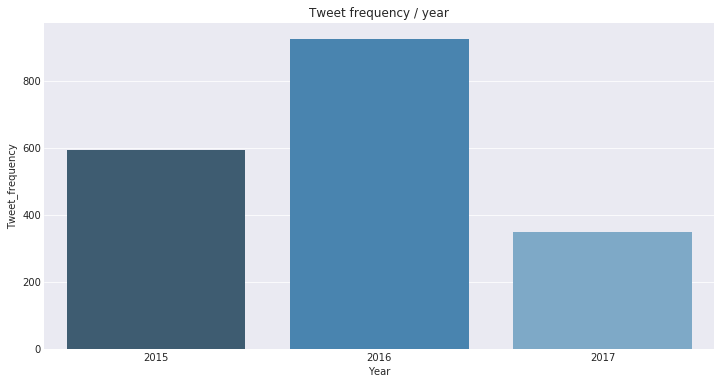

In [75]:
zz = twitter_master.groupby(twitter_master.timestamp.dt.year).tweet_id.count()
zz = pd.DataFrame(zz)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = zz.index , y=zz.tweet_id,  palette='Blues_d' )
ax.set(xlabel='Year', ylabel='Tweet_frequency', title='Tweet frequency / year')
plt.show()

### 1.5.2 Tweet frequency / Source

#### Code & Figure [2]

* Tweet frequency / Source :  
The highest frequent source for tweets was twitter for iphone

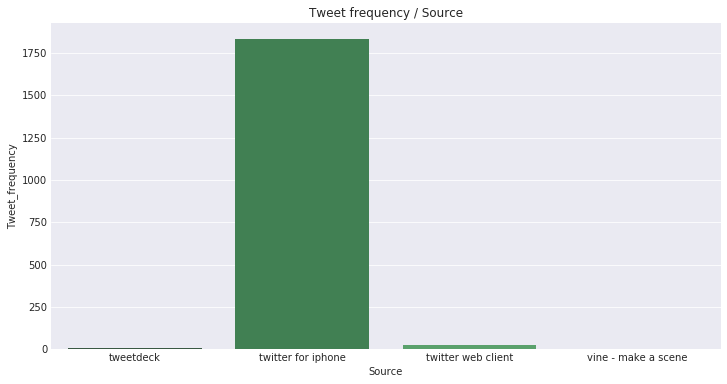

In [76]:
ay = twitter_master.groupby(twitter_master.source).tweet_id.count()
ay = pd.DataFrame(ay)
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = ay.index , y=ay.tweet_id,  palette='Greens_d' )
ax.set(xlabel='Source', ylabel='Tweet_frequency', title='Tweet frequency / Source')
plt.show()

### 1.5.3 Beloved dog_stage from likes(favourite_count)

#### Code & Figure [3]

* Beloved dog_stage from likes(favourite_count)  :  
The most beloved dog stage is pupper then doggo depend on favourite_count  .

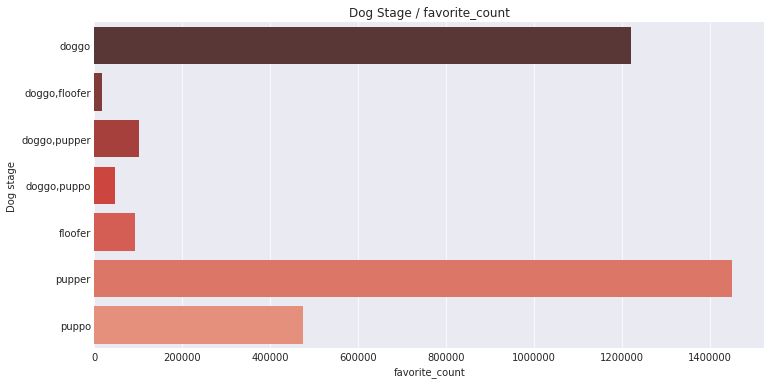

In [77]:
dog_stage_favorite = twitter_master.groupby(['dog_stage'],as_index=False).favorite_count.sum()
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = dog_stage_favorite.favorite_count, y=dog_stage_favorite.dog_stage,  palette='Reds_d' )
ax.set(xlabel='favorite_count', ylabel='Dog stage', title='Dog Stage / favorite_count')
plt.show()

### 1.5.4 Beloved dog_stage from text_rating 

#### Code & Figure [4]

* Beloved dog_stage from text_rating  :  
The most beloved dog stage is doggo-puppo depend on tweet text  .

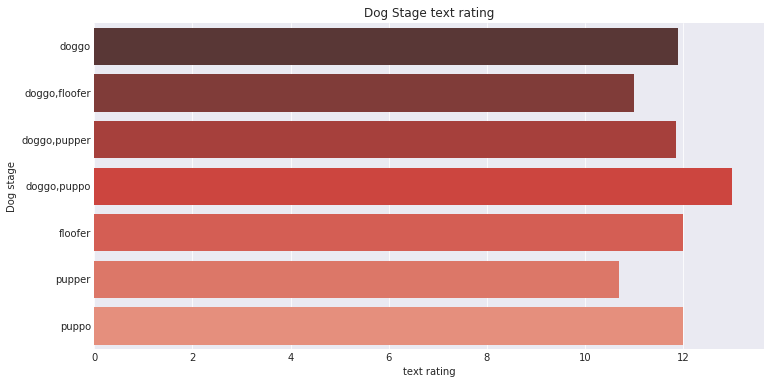

In [78]:
dog_stage_favorite = twitter_master.groupby(['dog_stage'],as_index=False).rating_numerator.mean()

dog_stage_favorite
fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x  = dog_stage_favorite.rating_numerator, y=dog_stage_favorite.dog_stage,  palette='Reds_d' )
ax.set(xlabel='text rating', ylabel='Dog stage', title='Dog Stage text rating')
plt.show()

### 1.5.5 Beloved dog name from likes(favourite_count)

#### Code & Figure [5]

* Beloved dog name from likes(favourite_count)  :  
The most beloved dog name is Aja then Albus .

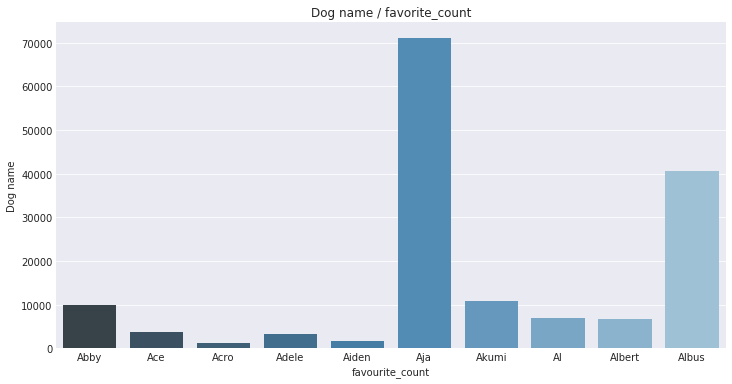

In [79]:
freq_name = twitter_master.groupby(['name'],as_index=False).favorite_count.sum()
freq_name.favorite_count.sort_values(ascending = False)
freq_name = freq_name.head(10)

fig, ax = plt.subplots(figsize=(12, 6))
ax = sns.barplot(x=freq_name.name, y  = freq_name.favorite_count, palette='Blues_d' ,ax=ax)
ax.set(xlabel='favourite_count', ylabel='Dog name', title='Dog name / favorite_count')
plt.show()

#  Many Thanks :)